## 决策树/随机森林

- 回归（线性、逻辑） >> 预测 参数估计
- 分类（决策树）

### 决策树几个概念

- 根节点
- 父节点 & 子节点（叶子结点）

有数据集，自动形成决策树（how），

- 节点的“不纯度” **impurity**——2个指标能否完全分开（Gini系数；墒）
    - GINI = 1 -[P（i1）+P（i2）+...]
    - Entropy  0 -1
- 信息增益**Gain**
    - Gain ratio 

## Step1 **数据准备**

In [2]:
import pandas as pd
credit_df = pd.read_csv("../machine-learning/datasets/credit/credit.csv")
credit_df.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,...,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,good
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,bad
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,good
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,good
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,bad


#### 一个字节 8位

- int64/folat64：需要8个字节来保存  内存16g，只能保存2g的int64
- object（str）一般我们都转化为数字来

- 一个字节能保存最大的数字为0，最大为254（0XFFH =255

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   checking  1000 non-null   int64 
 1   duration  1000 non-null   int64 
 2   history   1000 non-null   int64 
 3   purpose   1000 non-null   object
 4   amount    1000 non-null   int64 
 5   savings   1000 non-null   int64 
 6   employed  1000 non-null   int64 
 7   installp  1000 non-null   int64 
 8   marital   1000 non-null   int64 
 9   coapp     1000 non-null   int64 
 10  resident  1000 non-null   int64 
 11  property  1000 non-null   int64 
 12  age       1000 non-null   int64 
 13  other     1000 non-null   int64 
 14  housing   1000 non-null   int64 
 15  existcr   1000 non-null   int64 
 16  job       1000 non-null   int64 
 17  depends   1000 non-null   int64 
 18  telephon  1000 non-null   int64 
 19  foreign   1000 non-null   int64 
 20  good_bad  1000 non-null   object
dtypes: int64(19), o

In [6]:
credit_df.isnull()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,...,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
credit_df.purpose.head
credit_df.purpose.value_counts()

0    3
1    3
2    6
3    2
4    0
Name: purpose, dtype: object

#### 独热编码  **矩阵运算**

In [10]:
# 把类别型变量进行独热编码(1->N)
checking = pd.get_dummies(credit_df.checking,prefix='checking')
history = pd.get_dummies(credit_df.history,prefix='history')
purpose = pd.get_dummies(credit_df.purpose,prefix='purpose')
savings = pd.get_dummies(credit_df.savings,prefix='savings')
employed = pd.get_dummies(credit_df.employed,prefix='employed')    
installp = pd.get_dummies(credit_df.installp,prefix='installp')
marital = pd.get_dummies(credit_df.marital,prefix='marital')
coapp = pd.get_dummies(credit_df.coapp,prefix='coapp')
installp = pd.get_dummies(credit_df.installp,prefix='installp')
resident = pd.get_dummies(credit_df.resident,prefix='resident')
property = pd.get_dummies(credit_df.property,prefix='property')
housing = pd.get_dummies(credit_df.housing,prefix='housing')
existcr = pd.get_dummies(credit_df.existcr,prefix='existcr')
job = pd.get_dummies(credit_df.job,prefix='job')
depends = pd.get_dummies(credit_df.depends,prefix='depends')
telephon = pd.get_dummies(credit_df.telephon,prefix='telephon')
foreign = pd.get_dummies(credit_df.foreign,prefix='foreign')

# 随便查看一个编码后的数据
purpose.head()

,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_8,purpose_9,purpose_X
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False


In [16]:
trainData_X = pd.concat([credit_df.duration, credit_df.amount, credit_df.age, checking, history, purpose, savings, employed, installp, marital, coapp, installp, resident, property, housing, existcr, job, depends, telephon, foreign], axis=1)
trainData_X.columns
trainData_X.shape

(1000, 72)

In [17]:
credit_df['target'] = 0
credit_df.loc[(credit_df.good_bad == 'bad'), 'target'] = 1

trainData_y = credit_df['target'] 
trainData_y.value_counts()

target
0    700
1    300
Name: count, dtype: int64

In [27]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData_X, trainData_y, test_size=0.3, random_state=123456)

### Step2 模型构建

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [30]:
# 查看模型结果
dtree.classes_
dtree.feature_importances_.shape
dtree.max_features_
dtree.n_classes_
#dtree.n_features_
dtree.n_outputs_
dtree.tree_

In [21]:
# 查看特征的重要性排序
import pandas as pd
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = dtree.feature_importances_
features = features.sort_values(by =['importance'], ascending=False)

# 显示最重要的前10个特征变量
features.head(20)

,feature,importance
1,amount,0.151583
6,checking_4,0.123924
0,duration,0.113771
2,age,0.074848
22,savings_1,0.039369
12,purpose_0,0.038732
26,savings_5,0.033097
8,history_1,0.031133
10,history_3,0.030157
51,property_1,0.029658


In [31]:
# grid search调参
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12]
}

dtree = DecisionTreeClassifier()
dtree_search = GridSearchCV(dtree, parameters, scoring='accuracy', cv=5)
dtree_search.fit(X_train, y_train)

#查看最佳结果
print(dtree_search.best_estimator_)
print(dtree_search.best_score_)
print(dtree_search.best_params_)

DecisionTreeClassifier(max_depth=7)
0.7085714285714286
{'criterion': 'gini', 'max_depth': 7}


In [32]:
# 用最佳参数重新训练模型
dtree = DecisionTreeClassifier(criterion='gini',max_depth=7)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [33]:
from IPython.display import Image
import pydotplus

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['good','bad'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png()) 
graph.write_pdf("dtree.pdf")  

ModuleNotFoundError: No module named 'pydotplus'

### 练习

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl 
from matplotlib.font_manager import fontManager

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [63]:
iris_dataset = load_iris()
label = iris_dataset.keys()

print(label)
print(iris_dataset['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [64]:
data = iris_dataset['data']
label = iris_dataset['target']
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(data)
data = pd.DataFrame(X_minmax, columns=feature_names)

df = pd.DataFrame(data,columns=feature_names)

In [65]:
sepal_length = pd.get_dummies(df.sepal_length,prefix='sepal_length')
sepal_width = pd.get_dummies(df.sepal_width,prefix='sepal_width')
petal_length = pd.get_dummies(df.petal_length,prefix='petal_length')
petal_width = pd.get_dummies(df.petal_width,prefix='petal_width')

petal_width.head()

,petal_width_0.0,petal_width_0.04166666666666667,petal_width_0.08333333333333333,petal_width_0.125,petal_width_0.16666666666666669,petal_width_0.20833333333333331,petal_width_0.375,petal_width_0.4166666666666667,petal_width_0.4583333333333333,petal_width_0.5000000000000001,...,petal_width_0.6250000000000001,petal_width_0.6666666666666667,petal_width_0.7083333333333334,petal_width_0.75,petal_width_0.7916666666666667,petal_width_0.8333333333333335,petal_width_0.8750000000000001,petal_width_0.9166666666666666,petal_width_0.9583333333333334,petal_width_1.0
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
trainData_X = pd.concat([df.sepal_length, df.sepal_width, df.petal_length, df.petal_width], axis=1)
trainData_X.columns
trainData_X.shape

(150, 4)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData_X, label, test_size=0.3, random_state=123456)

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [69]:
# 查看特征的重要性排序
import pandas as pd
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = dtree.feature_importances_
features = features.sort_values(by =['importance'], ascending=False)

# 显示最重要的前10个特征变量
features.head(20)

,feature,importance
3,petal_width,0.538356
2,petal_length,0.419652
0,sepal_length,0.027706
1,sepal_width,0.014286


### Step3 从决策树到随机森林
从局部进行优化

In [71]:
from sklearn.ensemble import RandomForestClassifier

# 通过RandomForestClassifier类定义一个随机森林模型，名字叫rf
rf = RandomForestClassifier(n_estimators = 100)

# 对lr模型进行训练(fit)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# 查看特征的重要性排序
import pandas as pd
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rf.feature_importances_
features = features.sort_values(by =['importance'], ascending=False)

# 显示最重要的前10个特征变量
features.head(10)

,feature,importance
2,petal_length,0.546755
3,petal_width,0.360485
0,sepal_length,0.078605
1,sepal_width,0.014155


In [73]:
# grid search调参
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':[5,10,15,20,30],
    'max_features':[1,2,3,4],
    'criterion':['gini','entropy']
}

rf = RandomForestClassifier()
rf_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5)
rf_search.fit(X_train, y_train)

#查看最佳结果
rf_search.best_estimator_
rf_search.best_score_
rf_search.best_params_

/mnt/storage-data2/conda_env/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'gini', 'max_features': 1, 'n_estimators': 5}

In [74]:
# 用最佳参数重新训练模型
rf = RandomForestClassifier(criterion='gini',max_features=1,n_estimators=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=5)

In [76]:
# 查看特征的重要性排序
import pandas as pd
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rf.feature_importances_
features = features.sort_values(by =['importance'], ascending=False)

# 显示最重要的前10个特征变量
features.head(10)

,feature,importance
2,petal_length,0.439689
3,petal_width,0.302581
1,sepal_width,0.139525
0,sepal_length,0.118205


### Step4 模型评估

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)

# 分类评估汇总报告classification_report
print(classification_report(y_test,y_test_pred))

# 误分类矩阵 confusion_matrix
print(confusion_matrix(y_test,y_test_pred))
                       
# ROC曲线
fpr, tpr, thresholds =roc_curve(y_test, y_test_prob[:,1],pos_label=)

# print AUC值
auc = auc(fpr, tpr)
print(auc)

# plot ROC曲线
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0,1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()


SyntaxError: invalid syntax (1662397102.py, line 17)

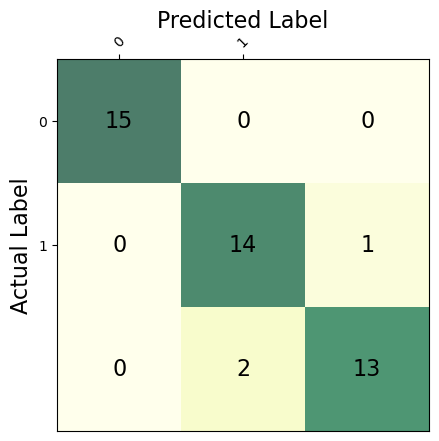

In [79]:
#来一个更美观一些误分类矩阵
def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()